# TP 1 : Optimisation sans contrainte

## Exercice 1 (énergie rayonnante d’un corps noir)

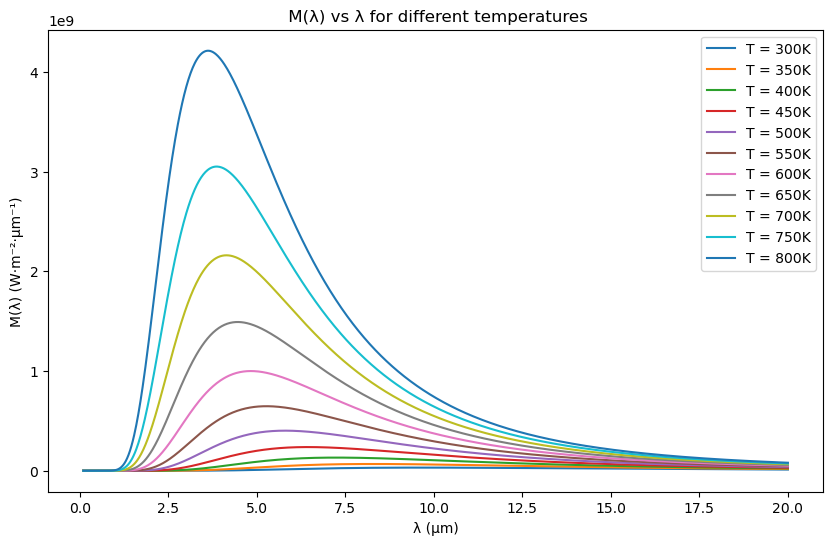

In [3]:
import numpy as np
import matplotlib.pyplot as plt


h = 6.625e-34  # Planck
C0 = 2.997e8
k = 1.380e-23  # Boltzmann
n = 1 

lambda_vals = np.linspace(1e-7, 2e-5, 1000)

def M_lambda(lambda_, T):
    numerator = 2 * np.pi * h * C0**2
    denominator = n**2 * lambda_**5 * (np.exp(h * C0 / (n * k * T * lambda_)) - 1)
    return numerator / denominator

T_list = np.arange(300, 801, 50)

plt.figure(figsize=(10, 6))
for T in T_list:
    M_vals = M_lambda(lambda_vals, T)
    plt.plot(lambda_vals * 1e6, M_vals, label=f"T = {T}K")

plt.xlabel("λ (μm)")
plt.ylabel("M(λ) (W·m⁻²·μm⁻¹)")
plt.title(" M(λ) vs λ for different temperatures")
plt.legend()
plt.show()


In [16]:
def golden_section_search(f, a, b, tol=1e-9, max_iter=1000):
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    c = a + resphi * (b - a)
    d = b - resphi * (b - a)
    fc = f(c)
    fd = f(d)
    for i in range(max_iter):
        if abs(b - a) < tol:
            break
        if fc < fd:
            b = d
            d = c
            fd = fc
            c = a + resphi * (b - a)
            fc = f(c)
        else:
            a = c
            c = d
            fc = fd
            d = b - resphi * (b - a)
            fd = f(d)
    return (a + b) / 2

search_a = 1e-7
search_b = 1e-4

lambda_star_values = {}
for T in T_list:
    f = lambda l: -M_lambda(l, T)
    lambda_star = golden_section_search(f, search_a, search_b)
    lambda_star_values[T] = lambda_star

print("T (K)", "λ* (m)")
for T in T_list:
    print(T, f"{lambda_star_values[T]:.4e}")

T (K) λ* (m)
300 9.6592e-06
350 8.2795e-06
400 7.2444e-06
450 6.4394e-06
500 5.7954e-06
550 5.2685e-06
600 4.8296e-06
650 4.4582e-06
700 4.1394e-06
750 3.8637e-06
800 3.6220e-06


In [15]:
print("T (K)", "λ* (m)", "λ*T (m·K)", "M(λ*) (W·m⁻²·m⁻¹)", "M(λ*)/T^5")
for T in T_list:
    lam_star = lambda_star_values[T]
    M_max = M_lambda(lam_star, T)
    product = lam_star * T
    ratio = M_max / T**5
    print(T,f"{lam_star:.4e}",f"{product:.4e}",f"{M_max:.4e}",f"{ratio:.4e}")

T (K) λ* (m) λ*T (m·K) M(λ*) (W·m⁻²·m⁻¹) M(λ*)/T^5
300 9.6592e-06 2.8978e-03 3.1242e+07 1.2857e-05
350 8.2795e-06 2.8978e-03 6.7527e+07 1.2857e-05
400 7.2444e-06 2.8978e-03 1.3165e+08 1.2857e-05
450 6.4394e-06 2.8977e-03 2.3725e+08 1.2857e-05
500 5.7954e-06 2.8977e-03 4.0178e+08 1.2857e-05
550 5.2685e-06 2.8977e-03 6.4707e+08 1.2857e-05
600 4.8296e-06 2.8978e-03 9.9975e+08 1.2857e-05
650 4.4582e-06 2.8978e-03 1.4918e+09 1.2857e-05
700 4.1394e-06 2.8976e-03 2.1609e+09 1.2857e-05
750 3.8637e-06 2.8978e-03 3.0510e+09 1.2857e-05
800 3.6220e-06 2.8976e-03 4.2130e+09 1.2857e-05


## Exercice 2 (méthodes de type gradient pour des fonctions quadratiques)

## Exercice 3 (Fonction de Rosenbrock)